# Análise Exploratória de Dados


### Introdução

Análise de jogos entre os anos de 2020 a 2023, análisar os mais vendidos, os melhores lançamentos e os mais jogados

## Dataset
Dataset obtido a partir de um ETL de dados

## Informações sobre os dados

- Informações sobre as colunas do conjunto de dados "best_sellers" ou seja, o conjunto de dados com os jogos mais vendidos
    - **ano**: Os jogos mais vendidos nesse ano
    - **rank**: dividido em Platinum, Gold, Silver e Bronze, do maior rank para o menor na ordem dada
    - **game**: Nome do game
    - **genre**: Genêro do game
    - **is_indie**: Se o game é indie ou não

- Informações sobre as colunas do conjunto de dados "best_releases" ou seja, o conjunto de dados com os jogos que tiveram melhor lançamento
    - **ano**: Os jogos mais vendidos nesse ano
    - **rank**: dividido em Platinum, Gold, Silver e Bronze, do maior rank para o menor na ordem dada
    - **game**: Nome do game
    - **genre**: Genêro do game
    - **is_indie**: Se o game é indie ou não

- Informações sobre as colunas do conjunto de dados "most_played" ou seja, o conjunto de dados com os jogos mais jogados
    - **ano**: Os jogos mais jogados nesse ano
    - **simultaneous_players**: Quantidade de jogadores simultaneos
    - **game**: Nome do game
    - **genre**: Genêro do game
    - **is_indie**: Se o game é indie ou não

## Objetivos
- O objetivo dessa análise será mostrar qual gênero de game foi mais vendido, teve melhores lançamento e também teve uma maior quantidade de jogadores simultaneos

# Insights Obtidos sobre jogos Indies
- Gêneros dos jogos mais vendidos
	1. Ação
	2. Aventura
	3. RPG
- Gêneros dos jogos que tiveram melhor desempenho no lançamento
	1. Aventura
	2. Ação
	3. RPG
- Gêneros dos jogos que foram mais jogados no ano
	1. Ação
	2. Aventura
	3. RPG

In [19]:
# Importações
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

In [20]:
# Carga dos conjutos de dados
df_best_sellers = pd.read_csv('arquivos/best_sellers.csv', sep=';')
df_best_releases = pd.read_csv('arquivos/best_releases.csv', sep=';')
df_most_played = pd.read_csv('arquivos/most_played.csv', sep=';')

## Como os dados estão organizados

In [21]:
df_best_sellers.head()

,year,rank,game,genre,is_indie
0,2020,Platinum,Counter-Strike 2,Action,False
1,2020,Platinum,Counter-Strike 2,Free to Play,False
2,2020,Platinum,Grand Theft Auto V,Action,False
3,2020,Platinum,Grand Theft Auto V,Adventure,False
4,2020,Platinum,Monster Hunter: World,Action,False


In [22]:
df_best_releases.head()

,year,rank,game,genre,is_indie
0,2020,Platinum,Grounded,Action,False
1,2020,Platinum,Grounded,Adventure,False
2,2020,Platinum,Wolcen: Lords of Mayhem,Action,True
3,2020,Platinum,Wolcen: Lords of Mayhem,Adventure,True
4,2020,Platinum,Wolcen: Lords of Mayhem,Indie,True


In [23]:
df_most_played.head()

,year,simultaneous_players,game,genre,is_indie
0,2020,200000,Dota 2,Action,False
1,2020,200000,Dota 2,Strategy,False
2,2020,200000,Dota 2,Free to Play,False
3,2020,200000,Among Us,Casual,False
4,2020,200000,PUBG: BATTLEGROUNDS,Action,False


### Informações importantes sobre os dados
- Cada jogo tem 1 ou mais gêneros, então cada game por estar em duas barras de um mesmo grafico.

## Distribuição dos jogos por ano

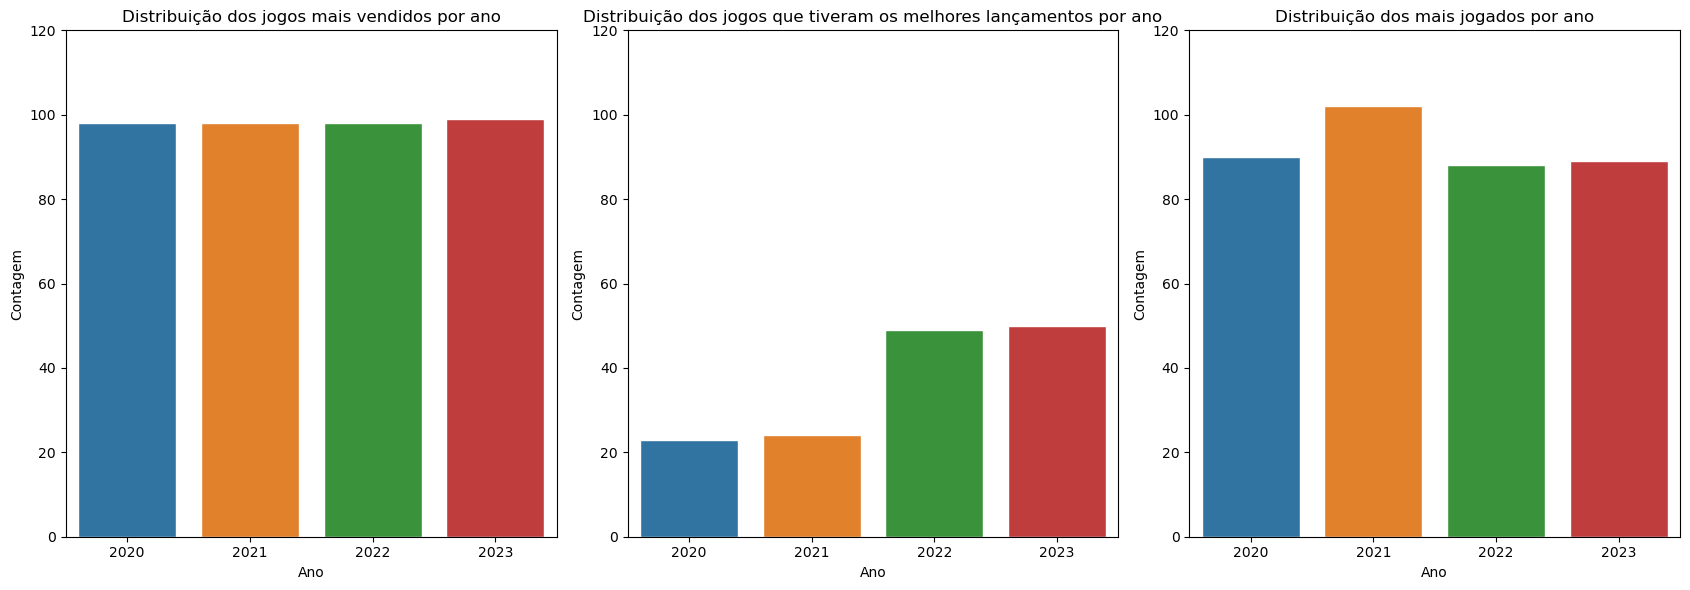

In [63]:
# Remover duplicatas dos dados
df_best_sellers_unique_game = df_best_sellers[['game', 'year']].drop_duplicates()
df_best_releases_unique_game = df_best_releases[['game', 'year']].drop_duplicates()
df_most_played_unique_game = df_most_played[['game', 'year']].drop_duplicates()

# Criando a figura e os subplots
fig, axs = plt.subplots(1, 3, figsize=(17, 6))

# Definindo o estilo dos eixos para 'whitegrid'
with sns.axes_style('whitegrid'):
    # Plotando o primeiro histograma (Jogos mais vendidos)
    sns.countplot(data=df_best_sellers_unique_game, x="year", ax=axs[0])
    axs[0].set(title='Distribuição dos jogos mais vendidos por ano', xlabel='Ano', ylabel='Contagem')
    axs[0].set_ylim([0, 120])  # Definindo os limites do eixo y
    
    # Plotando o segundo histograma (Jogos com melhores lançamentos)
    sns.countplot(data=df_best_releases_unique_game, x="year", ax=axs[1])
    axs[1].set(title='Distribuição dos jogos que tiveram os melhores lançamentos por ano', xlabel='Ano', ylabel='Contagem')
    axs[1].set_ylim([0, 120])  # Definindo os limites do eixo y

    # Plotando o terceiro histograma (Jogos mais jogados)
    sns.countplot(data=df_most_played_unique_game, x="year", ax=axs[2])
    axs[2].set(title='Distribuição dos mais jogados por ano', xlabel='Ano', ylabel='Contagem')
    axs[2].set_ylim([0, 120])  # Definindo os limites do eixo y

# Ajustando o layout
plt.tight_layout()

# Exibindo os histogramas lado a lado
plt.show()

### Ordem dos Gêneros nos gráficos

In [24]:
genre_counts = df_best_sellers['genre'].value_counts()
genre_counts = genre_counts.drop('Indie', errors='ignore')

genre_counts_1 = df_best_releases['genre'].value_counts()
genre_counts_1 = genre_counts_1.drop('Indie', errors='ignore')

genre_counts_2 = df_most_played['genre'].value_counts()
genre_counts_2 = genre_counts_2.drop('Indie', errors='ignore')

# Combine as séries de contagem de gêneros
combined_genre_counts = pd.concat([genre_counts, genre_counts_1, genre_counts_2], axis=1)

# Some as contagens para os gêneros comuns
combined_genre_counts = combined_genre_counts.sum(axis=1)

# Preencha os valores ausentes com 0
combined_genre_counts = combined_genre_counts.fillna(0)

# Ordene a série resultante em ordem alfabética
combined_genre_counts = combined_genre_counts.sort_index()

## Quais os Gêneros de Jogos tem melhores desempenhos em vendas?

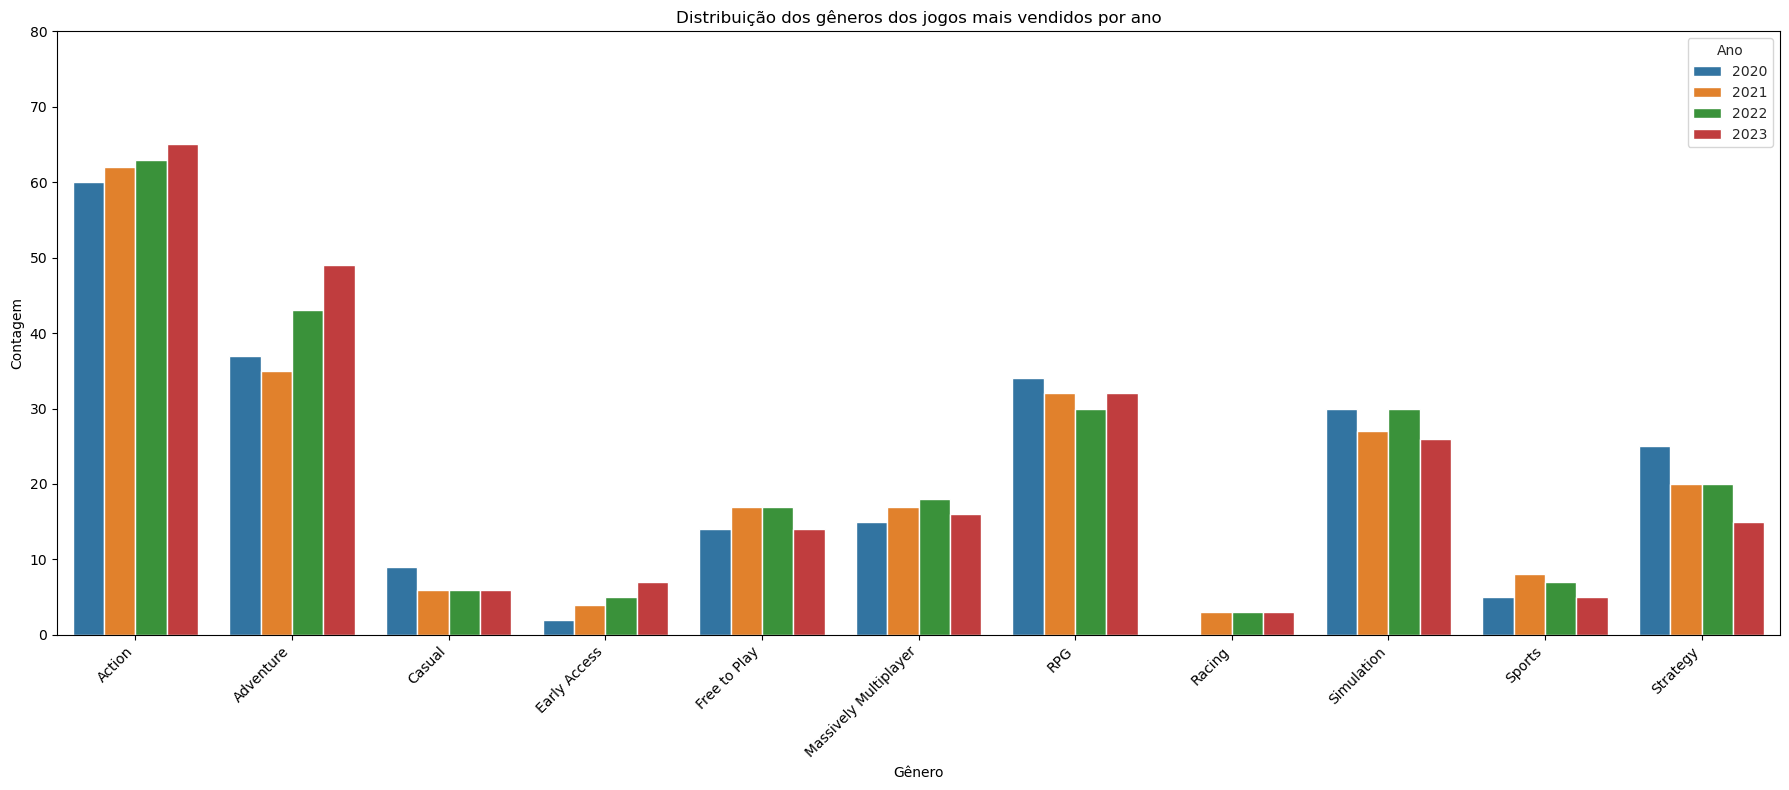

In [71]:
# Criando a figura e os subplots para o primeiro histograma
fig, axs = plt.subplots(1, 1, figsize=(18, 8))

# Definindo o estilo dos eixos para 'whitegrid'
with sns.axes_style('whitegrid'):
    # Plotando o primeiro histograma
    sns.countplot(data=df_best_sellers, x="genre", hue="year", order=combined_genre_counts.index, ax=axs)
    axs.set(title='Distribuição dos gêneros dos jogos mais vendidos por ano', xlabel='Gênero', ylabel='Contagem')
    axs.set_ylim([0, 80])  # Definindo os limites do eixo y
    # Ajustando os rótulos do eixo x
    plt.xticks(rotation=45, ha='right')
    
    # Ajustando a legenda
    axs.legend(title='Ano')
    
# Ajustando o layout
plt.tight_layout()

# Exibindo o primeiro histograma
plt.show()

- Gêneros dos jogos mais vendidos
	1. Ação
	2. Aventura
	3. RPG

## Quais os Gêneros de Jogos fazem mais sucesso no lançamento?

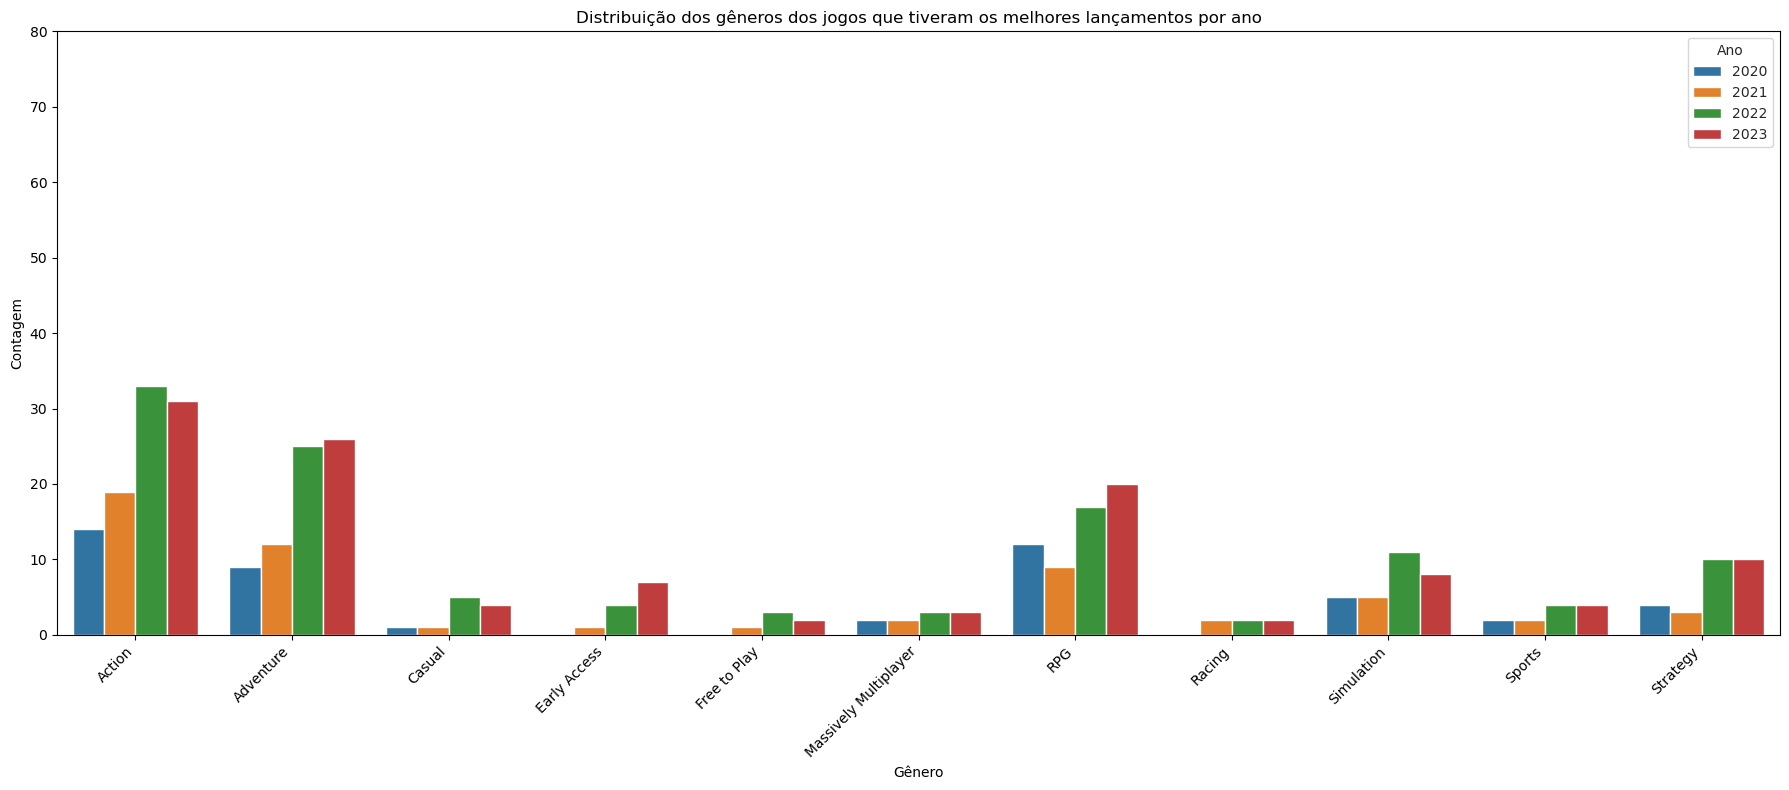

In [70]:
# Criando a figura e os subplots para o segundo histograma
fig, axs = plt.subplots(1, 1, figsize=(18, 8))

# Definindo o estilo dos eixos para 'whitegrid'
with sns.axes_style('whitegrid'):
    # Plotando o segundo histograma
    sns.countplot(data=df_best_releases, x="genre", hue="year", order=combined_genre_counts.index, ax=axs)
    axs.set(title='Distribuição dos gêneros dos jogos que tiveram os melhores lançamentos por ano', xlabel='Gênero', ylabel='Contagem')
    axs.set_ylim([0, 80])  # Definindo os limites do eixo y
    # Ajustando os rótulos do eixo x
    plt.xticks(rotation=45, ha='right')
    
    # Ajustando a legenda
    axs.legend(title='Ano')
    
# Ajustando o layout
plt.tight_layout()

# Exibindo o segundo histograma
plt.show()

- Gêneros dos jogos que tiveram melhor desempenho no lançamento
	1. Aventura
	2. Ação
	3. RPG

## Quais os Gêneros de Jogos fazem mais sucesso (São os mais jogados)?

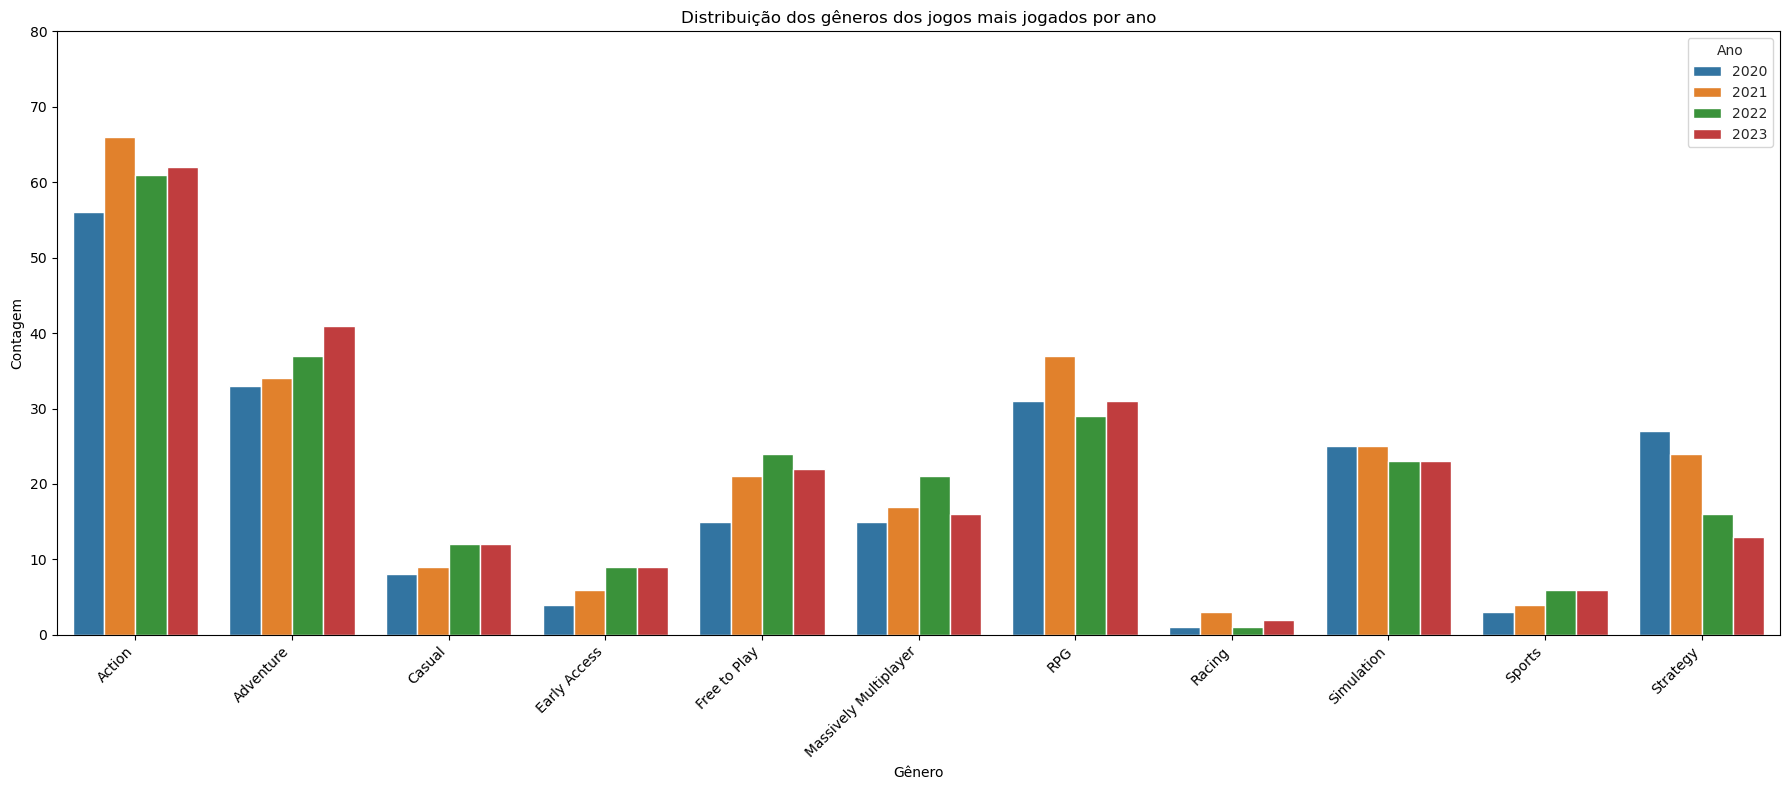

In [69]:
# Criando a figura e os subplots para o terceiro histograma
fig, axs = plt.subplots(1, 1, figsize=(18, 8))

# Definindo o estilo dos eixos para 'whitegrid'
with sns.axes_style('whitegrid'):
    # Plotando o terceiro histograma
    sns.countplot(data=df_most_played, x="genre", hue="year", order=combined_genre_counts.index, ax=axs)
    axs.set(title='Distribuição dos gêneros dos jogos mais jogados por ano', xlabel='Gênero', ylabel='Contagem')
    axs.set_ylim([0, 80])  # Definindo os limites do eixo y
    # Ajustando os rótulos do eixo x
    plt.xticks(rotation=45, ha='right')
    
    # Ajustando a legenda
    axs.legend(title='Ano')
    
# Ajustando o layout
plt.tight_layout()

# Exibindo o terceiro histograma
plt.show()

- Gêneros dos jogos que foram mais jogados no ano
	1. Ação
	2. Aventura
	3. RPG

# Como os jogos indies tem desempenhado com o passar do tempo

## Distribuição dos Jogos Indies por Ano

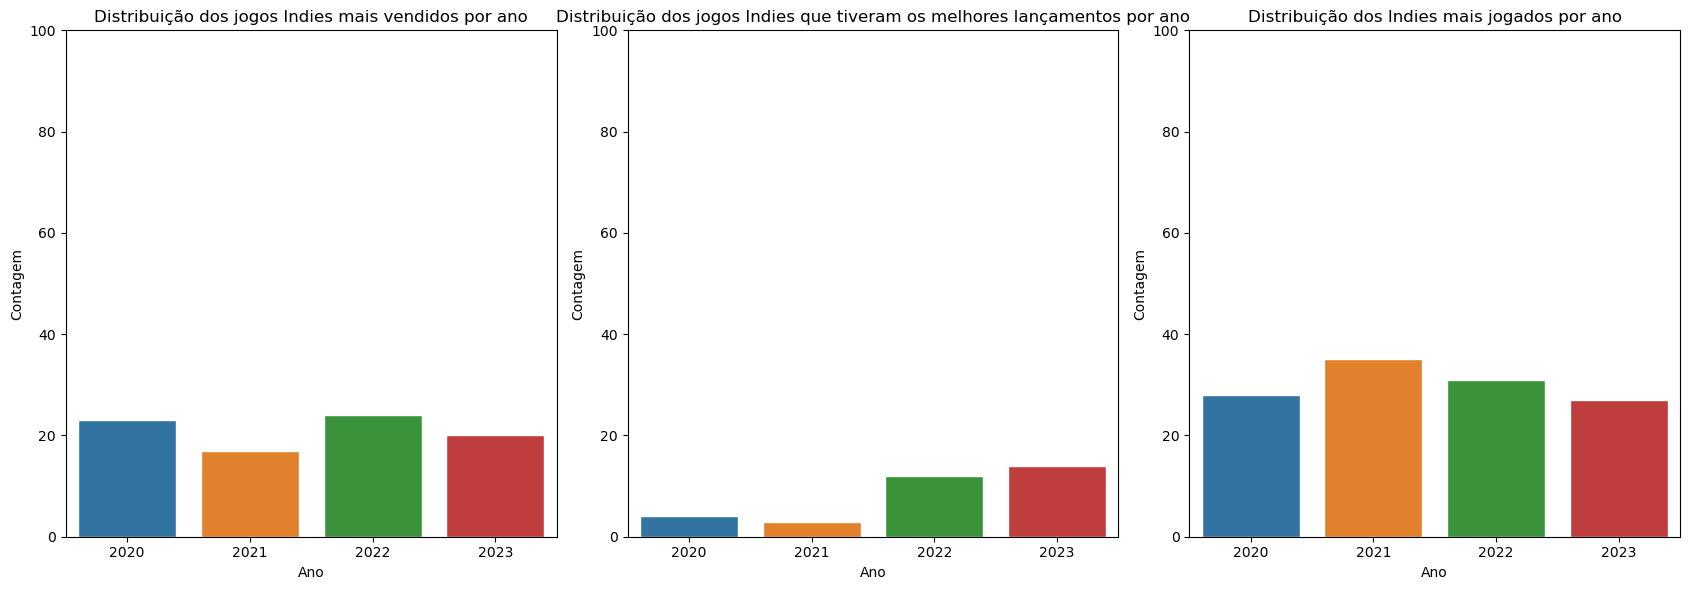

In [84]:
# Remover duplicatas dos dados
df_best_sellers_unique_game = df_indie_best_sellers[['game', 'year']].drop_duplicates()
df_best_releases_unique_game = df_indie_best_releases[['game', 'year']].drop_duplicates()
df_most_played_unique_game = df_indie_most_played[['game', 'year']].drop_duplicates()

# Criando a figura e os subplots
fig, axs = plt.subplots(1, 3, figsize=(17, 6))

# Definindo o estilo dos eixos para 'whitegrid'
with sns.axes_style('whitegrid'):
    # Plotando o primeiro histograma (Jogos mais vendidos)
    sns.countplot(data=df_best_sellers_unique_game, x="year", ax=axs[0])
    axs[0].set(title='Distribuição dos jogos Indies mais vendidos por ano', xlabel='Ano', ylabel='Contagem')
    axs[0].set_ylim([0, 100])  # Definindo os limites do eixo y
    
    # Plotando o segundo histograma (Jogos com melhores lançamentos)
    sns.countplot(data=df_best_releases_unique_game, x="year", ax=axs[1])
    axs[1].set(title='Distribuição dos jogos Indies que tiveram os melhores lançamentos por ano', xlabel='Ano', ylabel='Contagem')
    axs[1].set_ylim([0, 100])  # Definindo os limites do eixo y

    # Plotando o terceiro histograma (Jogos mais jogados)
    sns.countplot(data=df_most_played_unique_game, x="year", ax=axs[2])
    axs[2].set(title='Distribuição dos Indies mais jogados por ano', xlabel='Ano', ylabel='Contagem')
    axs[2].set_ylim([0, 100])  # Definindo os limites do eixo y

# Ajustando o layout
plt.tight_layout()

# Exibindo os histogramas lado a lado
plt.show()

## Quais os Gêneros de Jogos Indies tem melhores desempenhos em vendas?

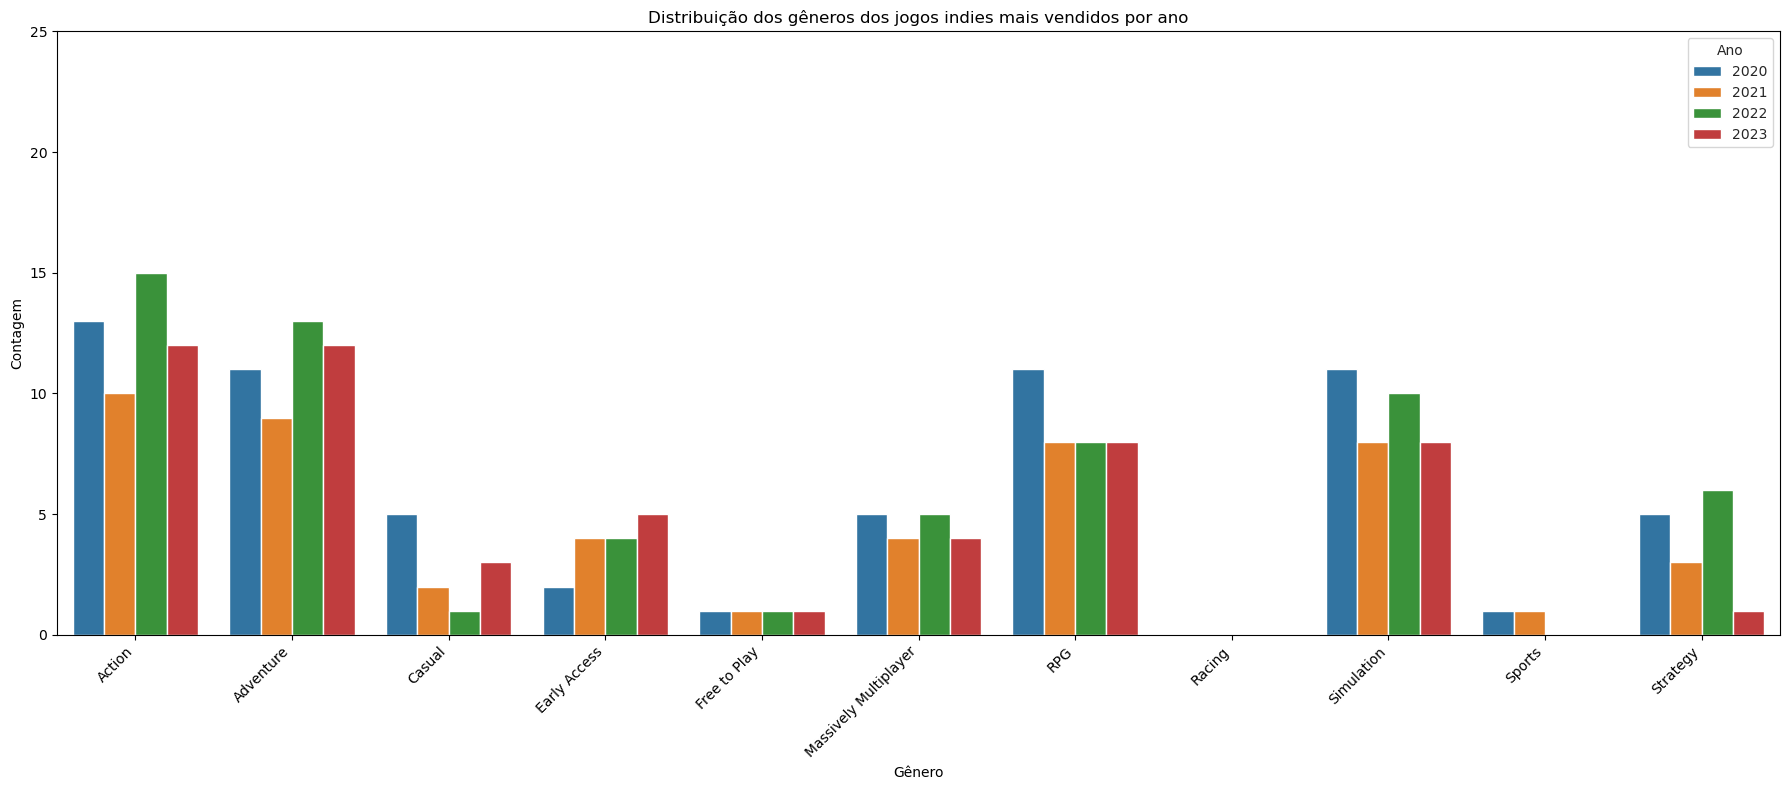

In [88]:
# Criando a figura e os subplots para o primeiro histograma
fig, axs = plt.subplots(1, 1, figsize=(18, 8))

# Definindo o estilo dos eixos para 'whitegrid'
with sns.axes_style('whitegrid'):
    # Plotando o primeiro histograma
    sns.countplot(data=df_indie_best_sellers, x="genre", hue="year", order=combined_genre_counts.index, ax=axs)
    axs.set(title='Distribuição dos gêneros dos jogos indies mais vendidos por ano', xlabel='Gênero', ylabel='Contagem')
    axs.set_ylim([0, 25])  # Definindo os limites do eixo y
    # Ajustando os rótulos do eixo x
    plt.xticks(rotation=45, ha='right')
    
    # Ajustando a legenda
    axs.legend(title='Ano')
    
# Ajustando o layout
plt.tight_layout()

# Exibindo o primeiro histograma
plt.show()

- Gêneros dos jogos mais vendidos
	1. Ação
	2. Aventura
	3. RPG

## Quais os Gêneros de Jogos Indies fazem mais sucesso no lançamento?

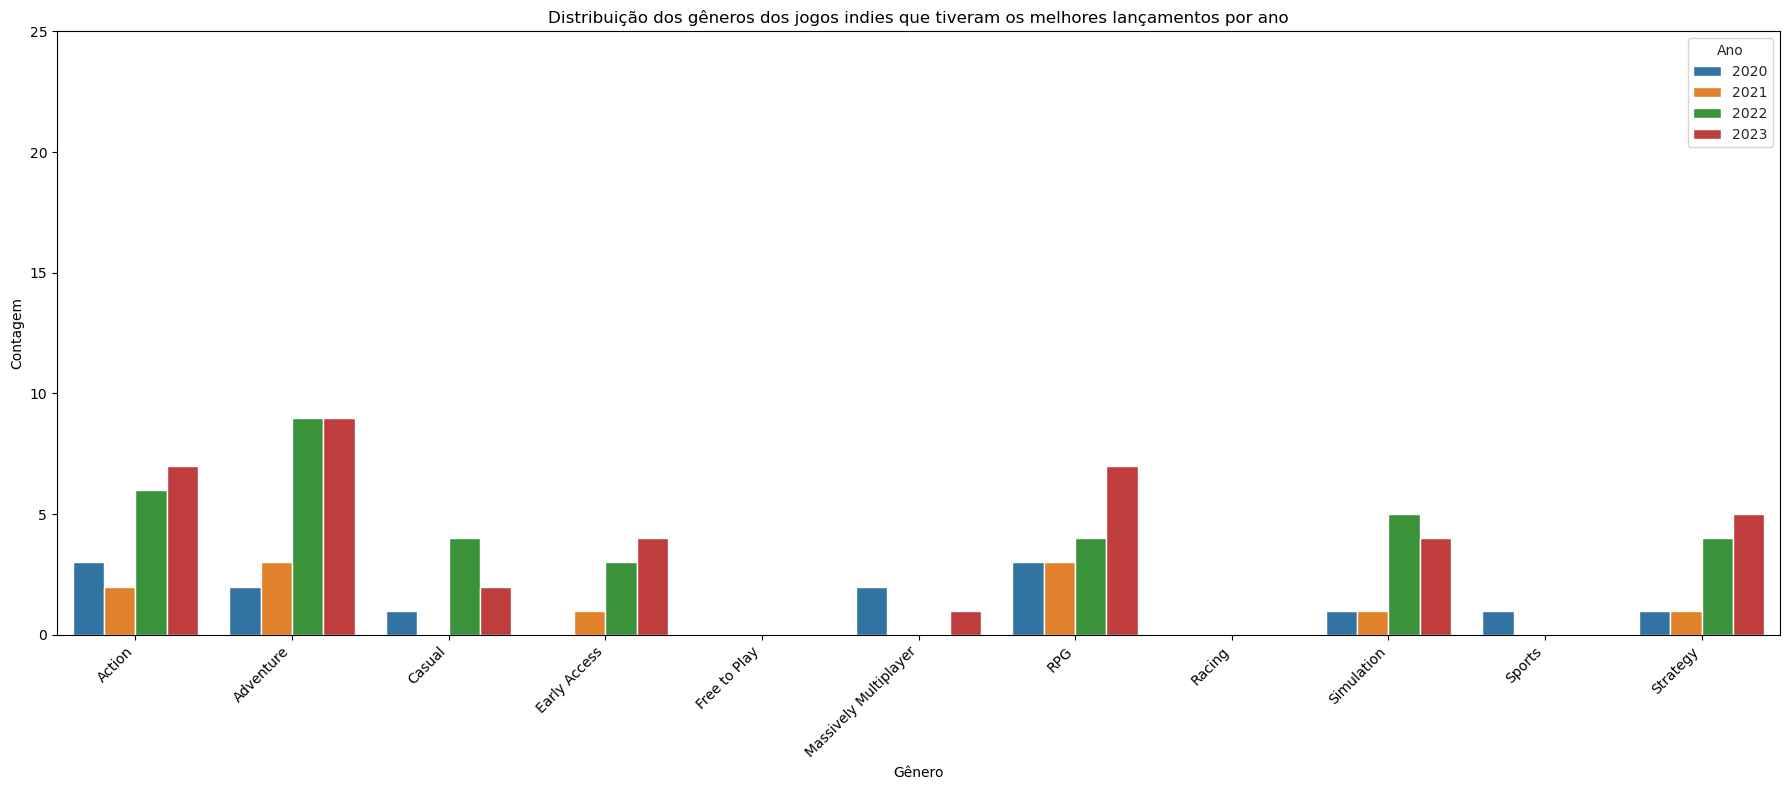

In [90]:
# Criando a figura e os subplots para o segundo histograma
fig, axs = plt.subplots(1, 1, figsize=(18, 8))

# Definindo o estilo dos eixos para 'whitegrid'
with sns.axes_style('whitegrid'):
    # Plotando o segundo histograma
    sns.countplot(data=df_indie_best_releases, x="genre", hue="year", order=combined_genre_counts.index, ax=axs)
    axs.set(title='Distribuição dos gêneros dos jogos indies que tiveram os melhores lançamentos por ano', xlabel='Gênero', ylabel='Contagem')
    axs.set_ylim([0, 25])  # Definindo os limites do eixo y
    # Ajustando os rótulos do eixo x
    plt.xticks(rotation=45, ha='right')
    
    # Ajustando a legenda
    axs.legend(title='Ano')
    
# Ajustando o layout
plt.tight_layout()

# Exibindo o segundo histograma
plt.show()

- Gêneros dos jogos que tiveram melhor desempenho no lançamento
	1. Aventura
	2. Ação
	3. RPG

## Quais os Gêneros de Jogos Indies fazem mais sucesso (São os mais jogados)

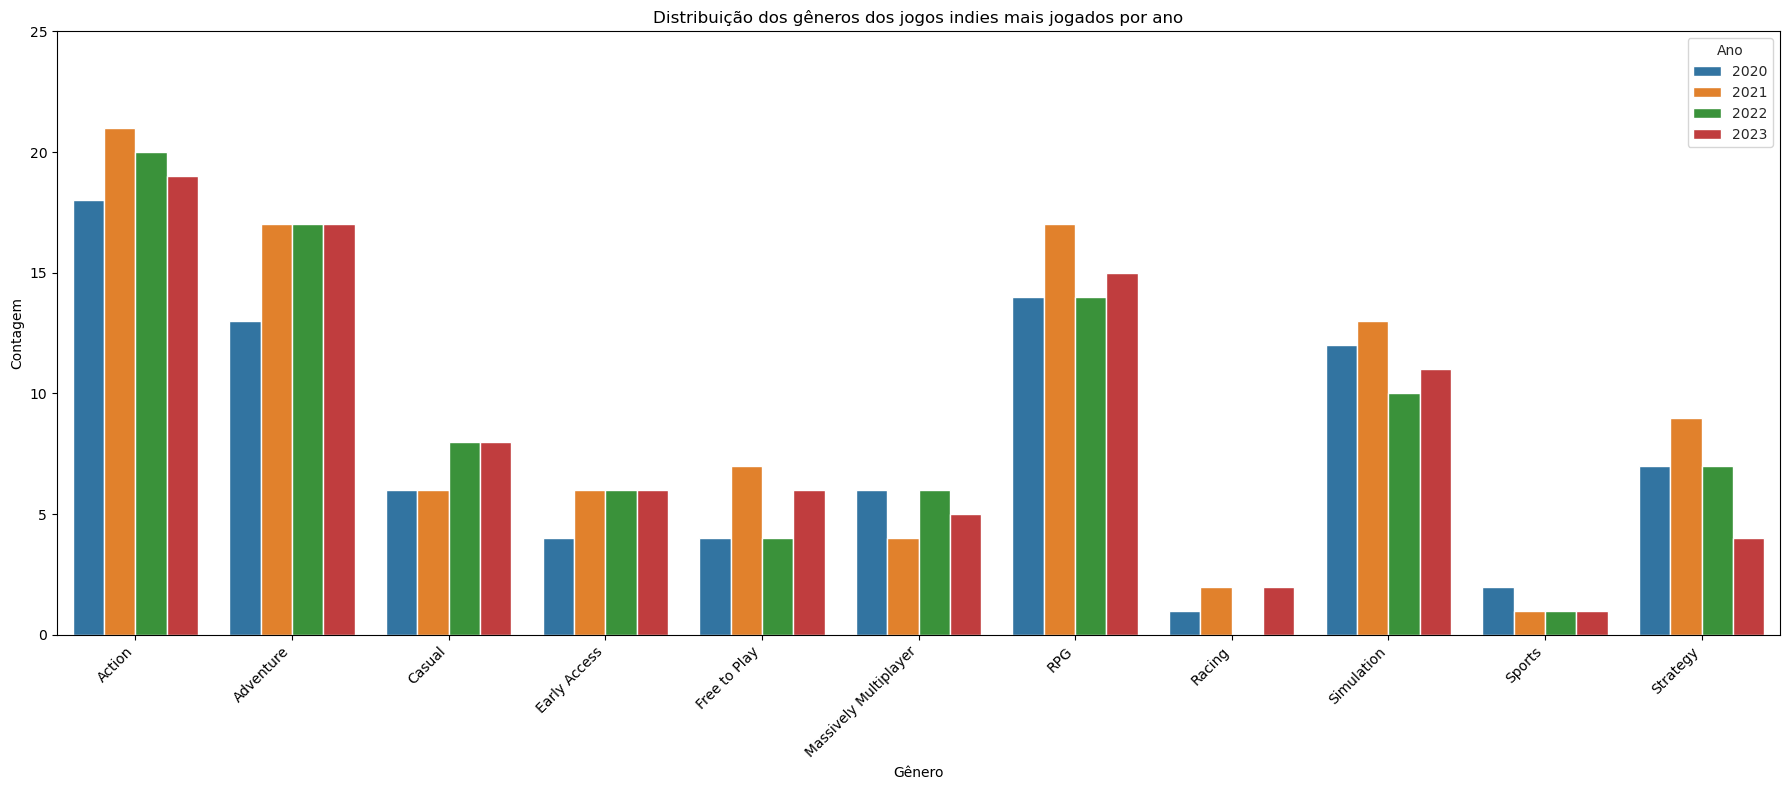

In [91]:
# Criando a figura e os subplots para o terceiro histograma
fig, axs = plt.subplots(1, 1, figsize=(18, 8))

# Definindo o estilo dos eixos para 'whitegrid'
with sns.axes_style('whitegrid'):
    # Plotando o terceiro histograma
    sns.countplot(data=df_indie_most_played, x="genre", hue="year", order=combined_genre_counts.index, ax=axs)
    axs.set(title='Distribuição dos gêneros dos jogos indies mais jogados por ano', xlabel='Gênero', ylabel='Contagem')
    axs.set_ylim([0, 25])  # Definindo os limites do eixo y
    # Ajustando os rótulos do eixo x
    plt.xticks(rotation=45, ha='right')
    
    # Ajustando a legenda
    axs.legend(title='Ano')
    
# Ajustando o layout
plt.tight_layout()

# Exibindo o terceiro histograma
plt.show()

- Gêneros dos jogos que foram mais jogados no ano
    1. Ação
    2. Aventura
    3. RPG

# Distribuição dos ranks dos jogos indies

## Distribuição dos  jogos indies por ranks

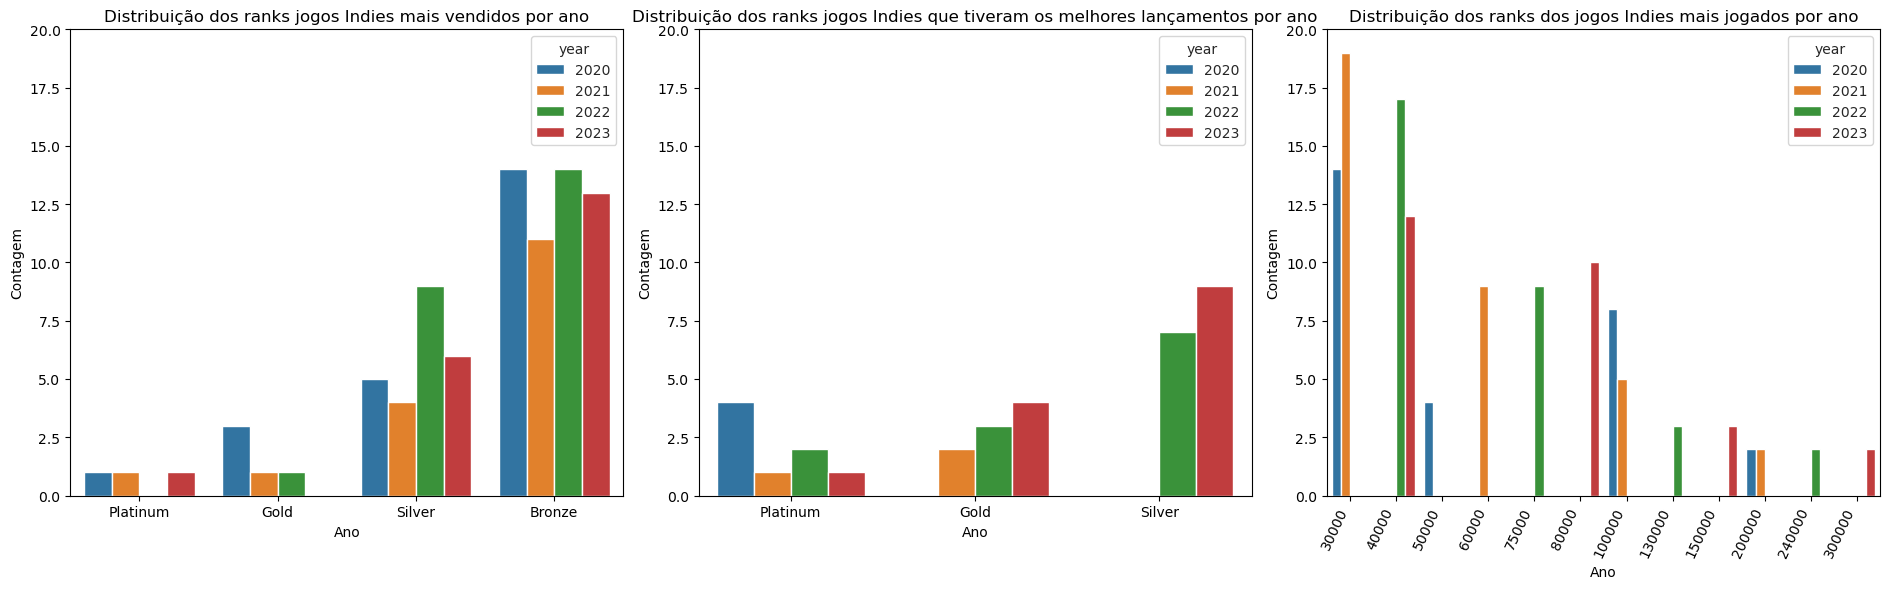

In [105]:
# Remover duplicatas dos dados
df_best_sellers_unique_game = df_indie_best_sellers[['game', 'rank', 'year']].drop_duplicates()
df_best_releases_unique_game = df_indie_best_releases[['game', 'rank', 'year']].drop_duplicates()
df_most_played_unique_game = df_indie_most_played[['game', 'simultaneous_players', 'year']].drop_duplicates()

# Criando a figura e os subplots
fig, axs = plt.subplots(1, 3, figsize=(19, 6))

# Definindo o estilo dos eixos para 'whitegrid'
with sns.axes_style('whitegrid'):
    # Plotando o primeiro histograma (Jogos mais vendidos)
    sns.countplot(data=df_best_sellers_unique_game, x="rank", hue="year", ax=axs[0])
    axs[0].set(title='Distribuição dos ranks jogos Indies mais vendidos por ano', xlabel='Ano', ylabel='Contagem')
    axs[0].set_ylim([0, 20])  # Definindo os limites do eixo y
    
    # Plotando o segundo histograma (Jogos com melhores lançamentos)
    sns.countplot(data=df_best_releases_unique_game, x="rank", hue="year", ax=axs[1])
    axs[1].set(title='Distribuição dos ranks jogos Indies que tiveram os melhores lançamentos por ano', xlabel='Ano', ylabel='Contagem')
    axs[1].set_ylim([0, 20])  # Definindo os limites do eixo y

    # Plotando o terceiro histograma (Jogos mais jogados)
    sns.countplot(data=df_most_played_unique_game, x="simultaneous_players", hue="year", ax=axs[2])
    axs[2].set(title='Distribuição dos ranks dos jogos Indies mais jogados por ano', xlabel='Ano', ylabel='Contagem')
    axs[2].set_ylim([0, 20])  # Definindo os limites do eixo y
    plt.xticks(rotation=65, ha='right')

# Ajustando o layout
plt.tight_layout()

# Exibindo os histogramas lado a lado
plt.show()

## Distribuição dos jogos mais vendidos por rank

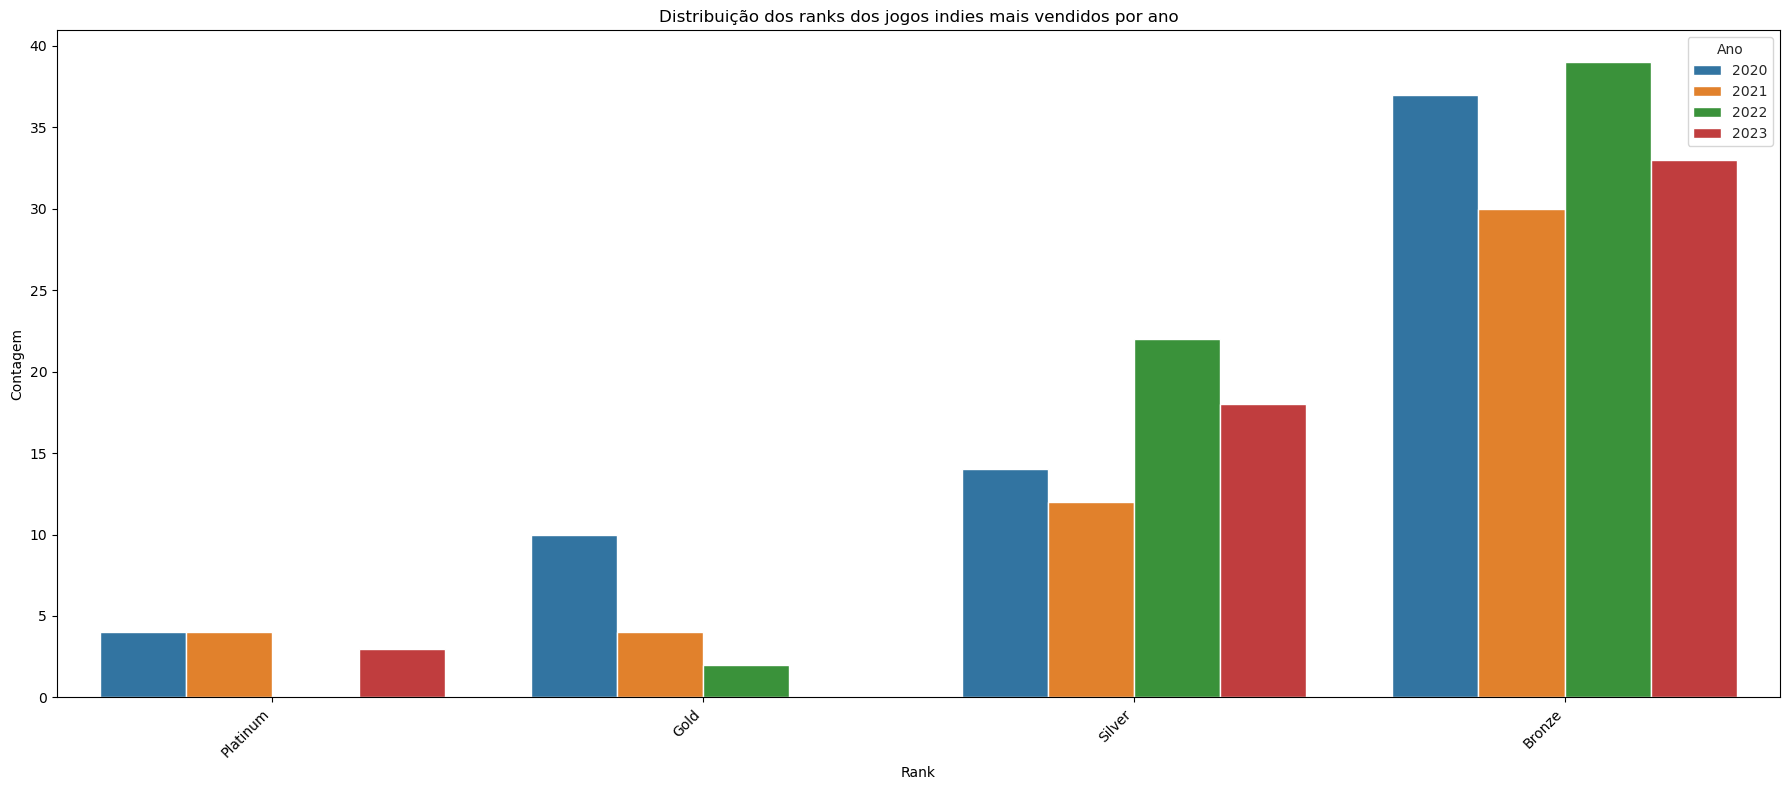

In [92]:
# Criando a figura e os subplots para o primeiro histograma
fig, axs = plt.subplots(1, 1, figsize=(18, 8))

# Definindo o estilo dos eixos para 'whitegrid'
with sns.axes_style('whitegrid'):
    # Plotando o primeiro histograma
    sns.countplot(data=df_indie_best_sellers, x="rank", hue="year", ax=axs)
    axs.set(title='Distribuição dos ranks dos jogos indies mais vendidos por ano', xlabel='Rank', ylabel='Contagem')
    
    # Ajustando os rótulos do eixo x
    plt.xticks(rotation=45, ha='right')
    
    # Ajustando a legenda
    axs.legend(title='Ano')
    
# Ajustando o layout
plt.tight_layout()

# Exibindo o primeiro histograma
plt.show()

#### O palco principal dos jogos indies mais vendidos é no rank "bronze", com boa concentração também no rank "gold"

## Distribuição dos jogos que tiveram melhores lançamentos por rank

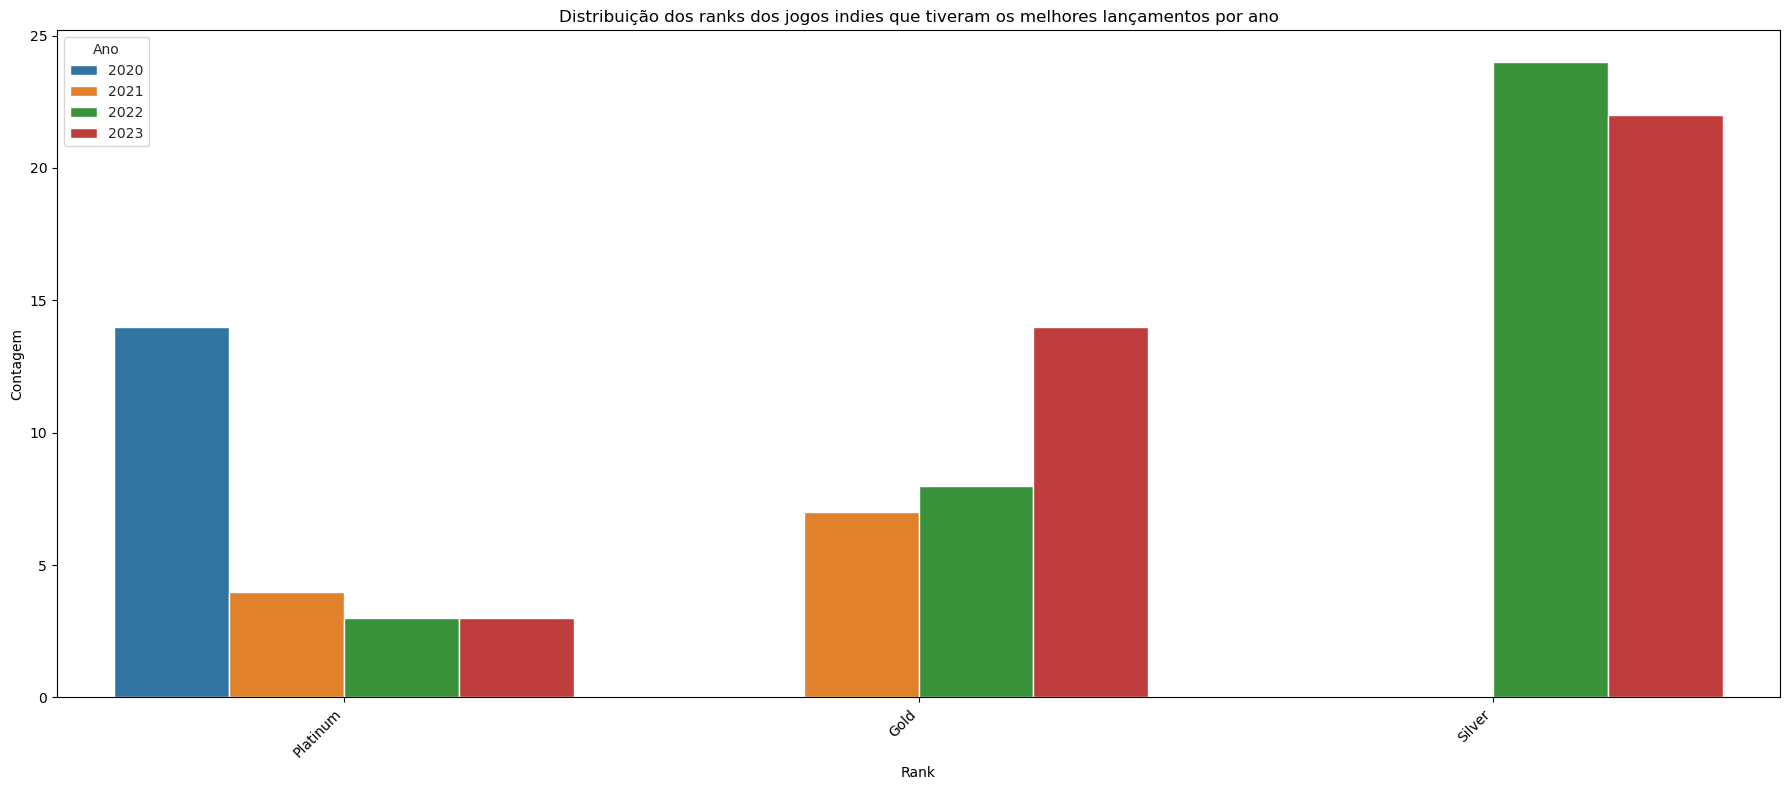

In [93]:
# Criando a figura e os subplots para o segundo histograma
fig, axs = plt.subplots(1, 1, figsize=(18, 8))

# Definindo o estilo dos eixos para 'whitegrid'
with sns.axes_style('whitegrid'):
    # Plotando o segundo histograma
    sns.countplot(data=df_indie_best_releases, x="rank", hue="year", ax=axs)
    axs.set(title='Distribuição dos ranks dos jogos indies que tiveram os melhores lançamentos por ano', xlabel='Rank', ylabel='Contagem')
    
    # Ajustando os rótulos do eixo x
    plt.xticks(rotation=45, ha='right')
    
    # Ajustando a legenda
    axs.legend(title='Ano')
    
# Ajustando o layout
plt.tight_layout()

# Exibindo o segundo histograma
plt.show()

#### Em 2020 aconteceu algo anormal, é possivel ver com o auxilio de gráficos anteriores que no ano de 2020 só teve jogos na classe "platinium", isso se deve à steam em 2020 não separar os games por categorias, e na extração dos dados foi colocado como uma única classe para os dados ficarem coerentes com as classes de outros anos.
#### Os lançamentos indie tem sua maioria no rank "bronze" e boa concentração também no rank "Gold". 

## Distribuição dos jogos mais jogados por rank

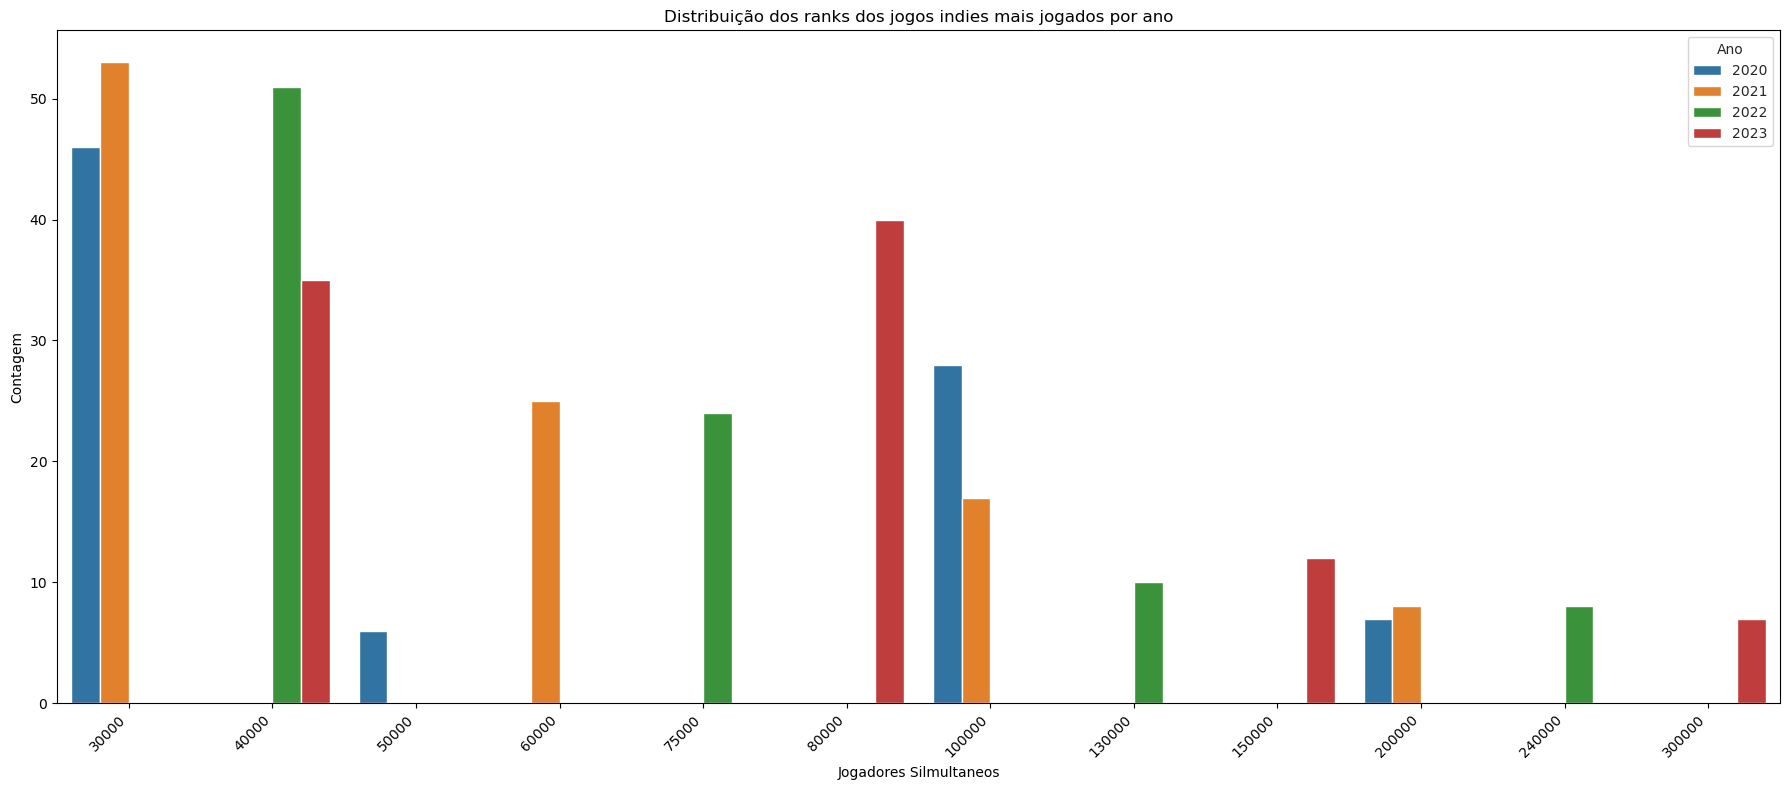

In [94]:
# Criando a figura e os subplots para o terceiro histograma
fig, axs = plt.subplots(1, 1, figsize=(18, 8))
ordered_counts = df_indie_most_played['simultaneous_players'].unique().sort()
# Definindo o estilo dos eixos para 'whitegrid'
with sns.axes_style('whitegrid'):
    # Plotando o terceiro histograma
    sns.countplot(data=df_indie_most_played, x="simultaneous_players", hue="year", order=ordered_counts , ax=axs)
    axs.set(title='Distribuição dos ranks dos jogos indies mais jogados por ano', xlabel='Jogadores Silmultaneos', ylabel='Contagem')
    
    # Ajustando os rótulos do eixo x
    plt.xticks(rotation=45, ha='right')
    
    # Ajustando a legenda
    axs.legend(title='Ano')
    
# Ajustando o layout
plt.tight_layout()

# Exibindo o terceiro histograma
plt.show()

#### A maioria dos jogos indies que tiveram no rank de mais jogados se concentra na classe de 30.000 jogades simultaneos e em segundo lugar jogos na casa de 100.000 jogadores simultaneos.